## Loading Data from the Dev GeoDB

The Database is hosted at AWS as an RDS service:

- Hostname: db-dcfs-geodb.cbfjgqxk302m.eu-central-1.rds.amazonaws.com
- Port: 5432
- Database postgres
- User: postres
- PostGIS initialised with: ```CREATE EXTENSION postgis```

Schema of the GeoDB:

```sql
CREATE TABLE "public"."land_use" (
    "id" integer DEFAULT nextval('land_user_id_seq') NOT NULL,
    "raba_id" integer NOT NULL,
    "d_od" date NOT NULL,
    "geometry" geometry NOT NULL,
    "raba_pid" double precision NOT NULL
) WITH (oids = false);
```



### Load Data using the convenience function _load_geodb_

__step 1__: Import the function and the default connection parameters to set the password

In [1]:
from dcfs_geodb import GeoDB
from dcfs_geodb import PG_DEFAULT_CONNECTION_PARAMETERS

__step 2__:

Set the password. It is also possible to set the password as an environment variable (_PG_GEODB_PASSWORD_)


In [2]:
PG_DEFAULT_CONNECTION_PARAMETERS['password'] = "Oeckel6b&z"
geodb = GeoDB(con=PG_DEFAULT_CONNECTION_PARAMETERS)

__step 3__: Load (all) data

It is possible to pass an sql statement. _load_geodb_ also accepts a _psycopg2_ connection. If ```con``` is None, teh DEFAULT will be used but you will require 
the password to be set as an environment variable.

_DEFAULT_LOAD_SQL_:

```sql
SELECT raba_pid, raba_id, d_od, geometry FROM land_use
```

In [3]:
gdfall = geodb.load_from_land_use()

In [4]:
gdfall

,id,raba_pid,raba_id,d_od,geometry
0,405344,4770326.0,1410,2019-03-26,"POLYGON ((453952.629 91124.177, 453952.696 911..."
1,405345,4770325.0,1300,2019-03-26,"POLYGON ((453810.376 91150.19899999999, 453812..."
2,405346,2305689.0,7000,2019-02-25,"POLYGON ((456099.635 97696.07000000001, 456112..."
3,405347,2305596.0,1100,2019-02-25,"POLYGON ((455929.405 97963.785, 455933.284 979..."
4,405348,2310160.0,1100,2019-03-11,"POLYGON ((461561.512 96119.25599999999, 461632..."
...,...,...,...,...,...
9822,415166,6253989.0,1600,2019-03-08,"POLYGON ((460637.334 96865.891, 460647.927 969..."
9823,415167,6252044.0,1600,2019-03-26,"POLYGON ((459467.868 96839.686, 459467.77 9686..."
9824,415168,6245985.0,2000,2019-04-08,"POLYGON ((459488.998 94066.24800000001, 459498..."
9825,415169,6245986.0,2000,2019-02-20,"POLYGON ((459676.68 94000, 459672.469 93981.44..."


__Step 4__: explore the data

Plot the polygons:

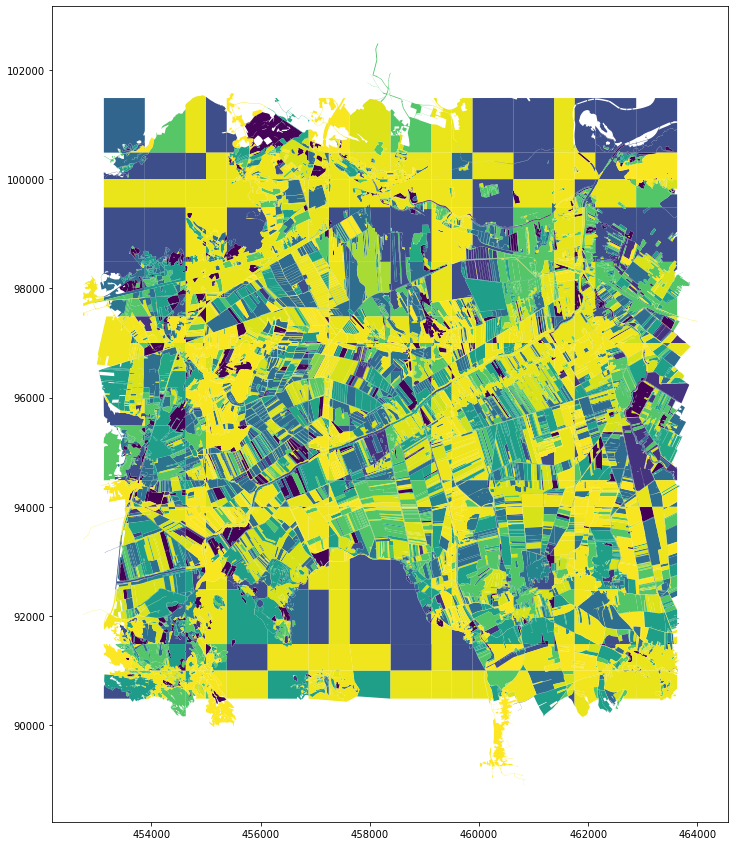

In [11]:
gdfall.plot(column="raba_pid", figsize=(15,15))

Subselect the data. Here: Select a specific use

In [6]:
gdfsub = geodb.load_from_land_use(where='raba_id=1410')

In [7]:
gdfsub

,id,raba_pid,raba_id,d_od,geometry
0,405344,4770326.0,1410,2019-03-26,"POLYGON ((453952.629 91124.177, 453952.696 911..."
1,405365,3616776.0,1410,2019-02-25,"POLYGON ((455384.809 97907.054, 455380.659 979..."
2,405371,3826126.0,1410,2019-01-23,"POLYGON ((462585.734 93088.98699999999, 462567..."
3,405375,2309744.0,1410,2019-01-05,"POLYGON ((457748.827 96167.35400000001, 457748..."
4,405377,2302127.0,1410,2019-04-01,"POLYGON ((456405.039 100087.946, 456399.544 10..."
...,...,...,...,...,...
1119,415094,6245421.0,1410,2019-03-11,"POLYGON ((459692.869 93956.16899999999, 459698..."
1120,415139,6262217.0,1410,2019-03-13,"POLYGON ((455169.735 93969.709, 455203.429 939..."
1121,415143,6265284.0,1410,2019-03-20,"POLYGON ((463359.777 97000, 463419.061 96954.3..."
1122,415144,6265285.0,1410,2019-03-20,"POLYGON ((463027.637 97000, 463034.005 96984.4..."


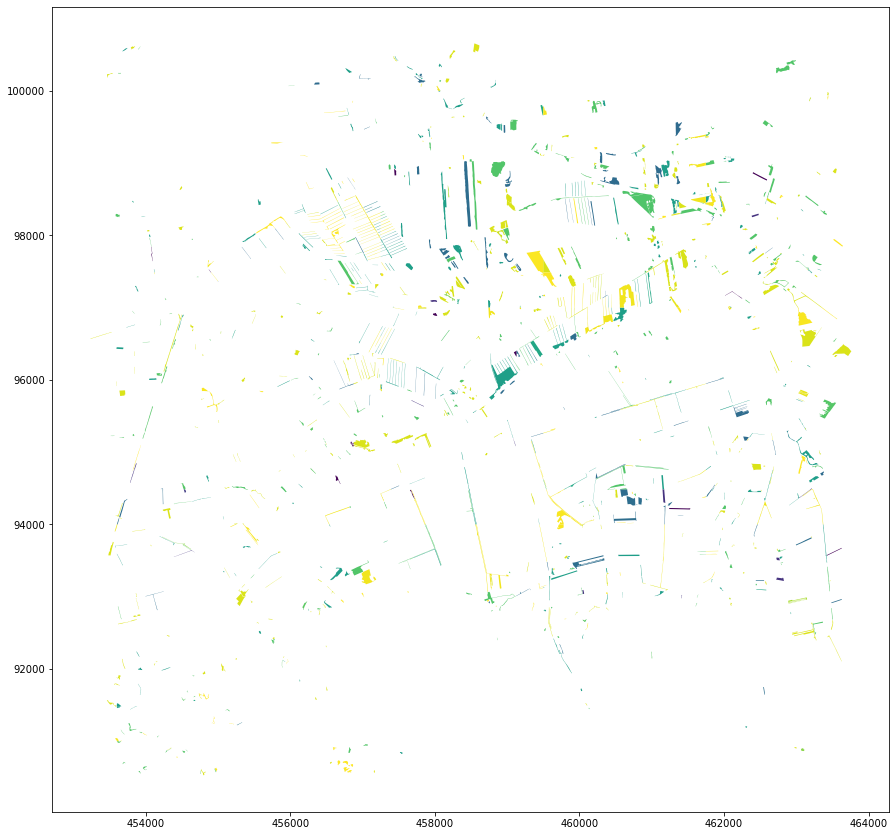

In [8]:
gdfsub.plot(column="raba_pid", figsize=(15,15))

In [9]:
#gdf = geodb.query_by_bbox(452750.0, 88909.549, 464000.0, 102486.299)
gdf = geodb.query_by_bbox('land_use', 458000.0, 94000.0, 460000.0, 96000.0)
gdf

,id,raba_id,d_od,geometry,raba_pid
0,405349,1500,2019-01-05,"POLYGON ((458139.092 95583.227, 458136.249 955...",3602865.0
1,405350,1500,2019-01-05,"POLYGON ((458123.067 95461.89200000001, 458123...",3602883.0
2,405395,1100,2019-01-05,"POLYGON ((458191.097 95805.16800000001, 458153...",2309384.0
3,405407,1500,2019-01-05,"POLYGON ((458377.268 94490.05499999999, 458374...",2314374.0
4,405415,1100,2019-03-26,"POLYGON ((459128.902 94536.99400000001, 459128...",4673864.0
...,...,...,...,...,...
470,415093,1600,2019-03-11,"POLYGON ((459526.899 94113.045, 459526.756 940...",6245420.0
471,415096,1600,2019-04-08,"POLYGON ((459491.685 94000, 459475.375 94000, ...",6245417.0
472,415168,2000,2019-04-08,"POLYGON ((459488.998 94066.24800000001, 459498...",6245985.0
473,415170,2000,2019-03-11,"POLYGON ((459690.58 94042.607, 459686.872 9403...",6245987.0


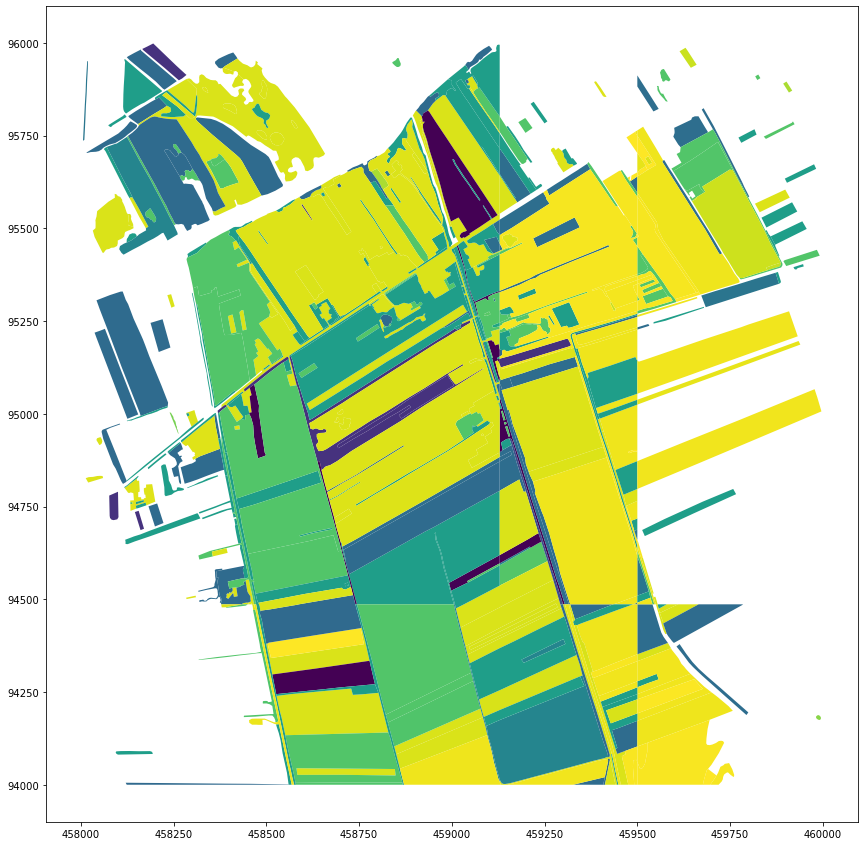

In [10]:
gdf.plot(column="raba_pid", figsize=(15,15))